# the goal of this machine learning is to analyze online shoppers' intention to make a purchase and predict the exit rates based on various features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier

### the dataset is from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets.php

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
data.describe(include='all')


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [4]:
# Explore distributions of numerical variables
num_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


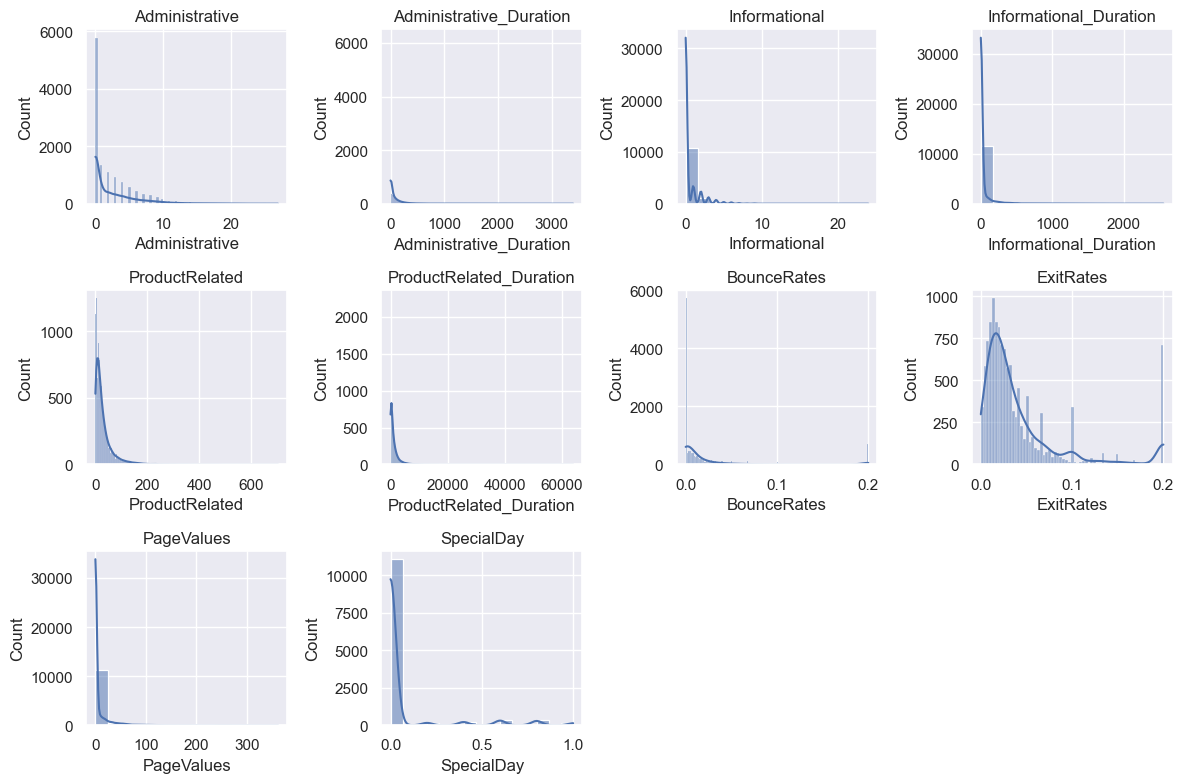

In [5]:
# Plot histograms for numerical variables
plt.figure(figsize=(12, 8))
for i, var in enumerate(num_vars):
    plt.subplot(3, 4, i+1)
    sns.histplot(data[var], kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()


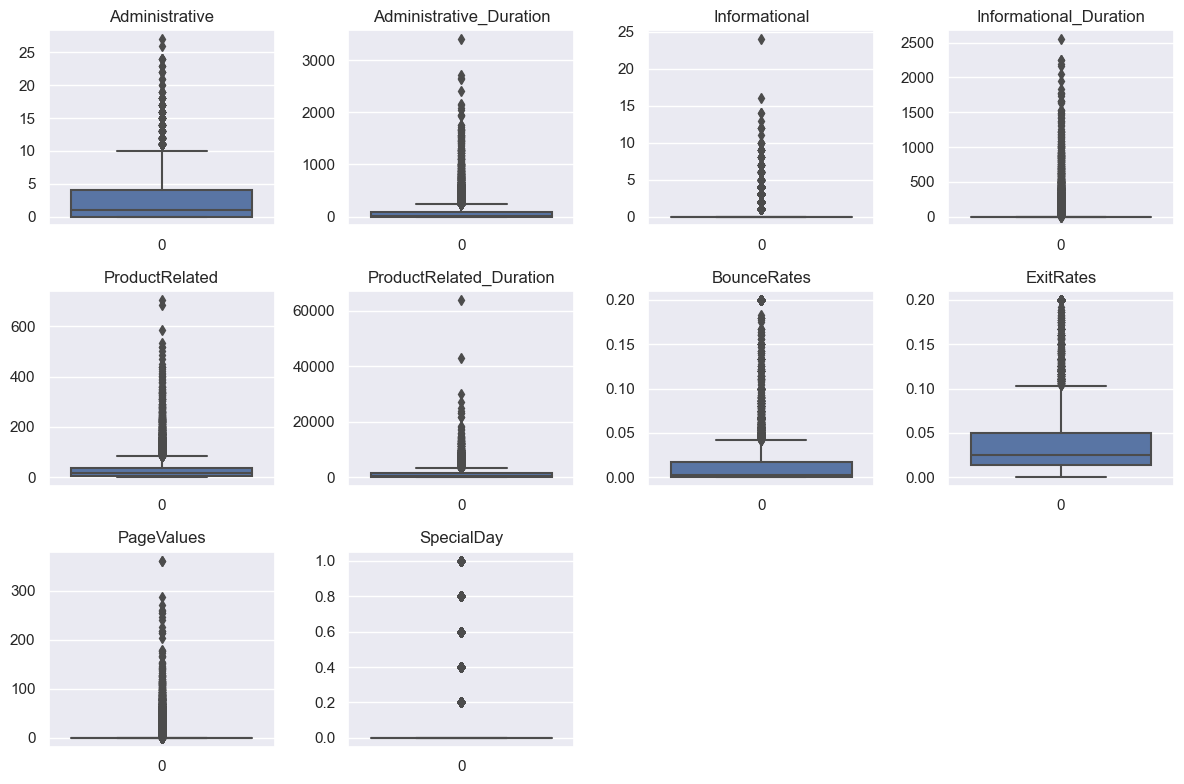

In [6]:
# Plot box plots for numerical variables

plt.figure(figsize=(12, 8))
for i, var in enumerate(num_vars):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=data[var])
    plt.title(var)
plt.tight_layout()
plt.show()


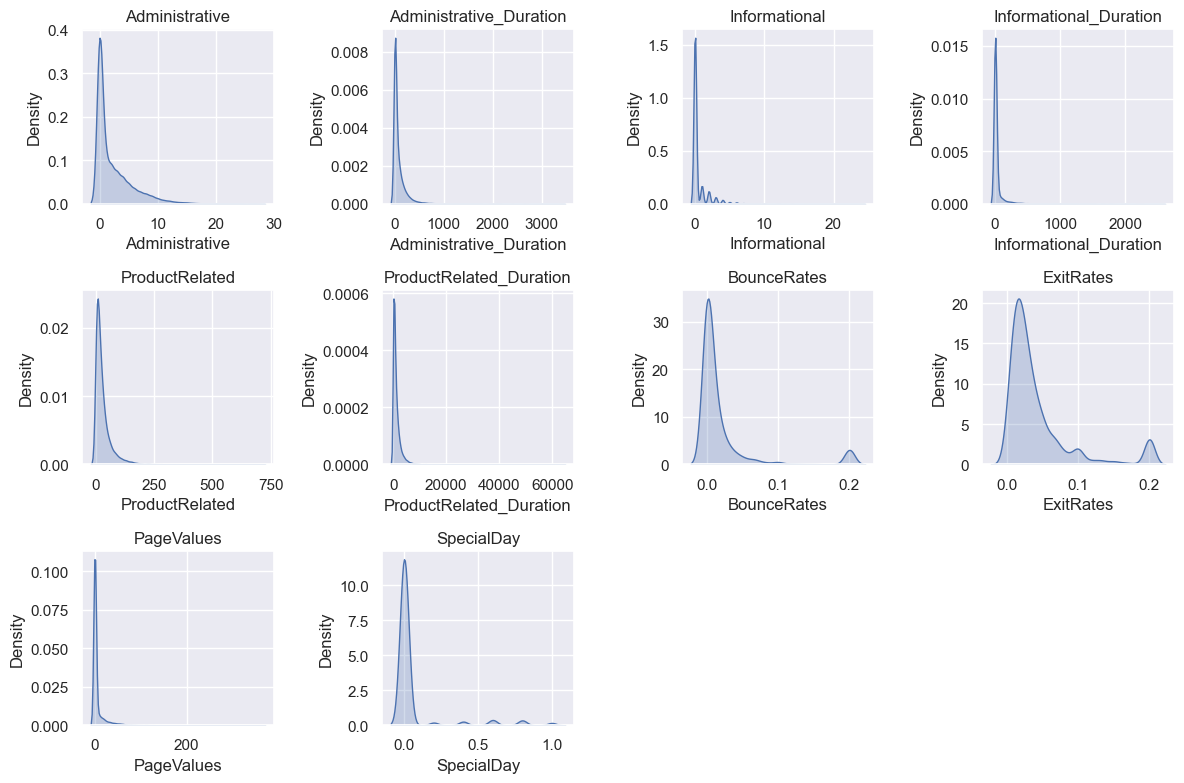

In [7]:
# Plot kernel density plots for numerical variables
plt.figure(figsize=(12, 8))
for i, var in enumerate(num_vars):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(data[var], fill=True)
    plt.title(var)
plt.tight_layout()
plt.show()

In [8]:
# Identify outliers using the IQR method
Q1 = data[num_vars].quantile(0.25)
Q3 = data[num_vars].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [9]:
# Count the number of outliers for each variable
outliers = ((data[num_vars] < lower_bound) | (data[num_vars] > upper_bound)).sum()
print("Number of outliers:")
print(outliers)

Number of outliers:
Administrative              404
Administrative_Duration    1172
Informational              2631
Informational_Duration     2405
ProductRelated              987
ProductRelated_Duration     961
BounceRates                1551
ExitRates                  1099
PageValues                 2730
SpecialDay                 1251
dtype: int64


In [10]:
# Filter out non-numeric columns from num_vars
numeric_columns = [col for col in num_vars if np.issubdtype(data[col].dtype, np.number)]

# Convert numeric_columns to a numeric array
numeric_array = np.array(data[numeric_columns], dtype=np.float64)

# Replace NaN values with the column mean
column_means = np.nanmean(numeric_array, axis=0)
nan_mask = np.isnan(numeric_array)
numeric_array[nan_mask] = np.take(column_means, np.where(nan_mask)[1])

# Calculate the median of the numeric array
median = np.median(numeric_array, axis=0)

# Replace outliers with the median value
for i in range(numeric_array.shape[1]):
    mask = (numeric_array[:, i] < lower_bound[i]) | (numeric_array[:, i] > upper_bound[i])
    numeric_array[mask, i] = median[i]

# Print the modified numeric array
print("Modified Numeric Array:")
print(numeric_array)


Modified Numeric Array:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.51564025e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.51564025e-02
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.66666670e-02
  0.00000000e+00 0.00000000e+00]
 [4.00000000e+00 7.50000000e+01 0.00000000e+00 ... 2.10526320e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.66666670e-02
  0.00000000e+00 0.00000000e+00]]


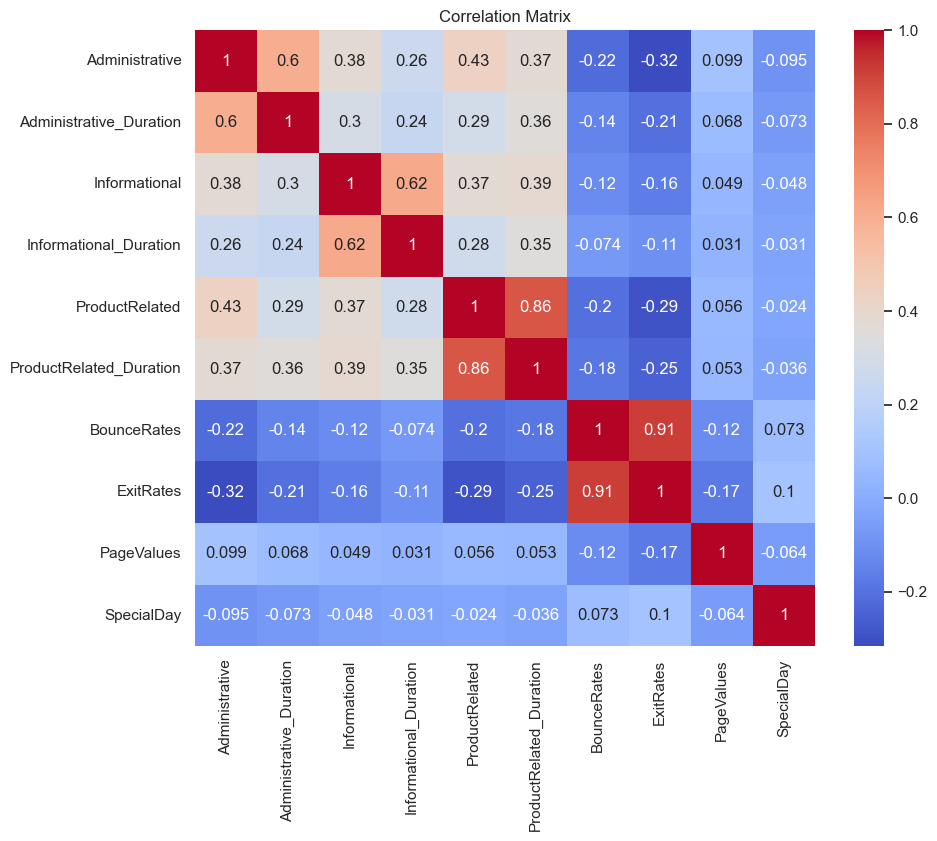

In [11]:
# Calculate the correlation matrix
correlation_matrix = data[num_vars].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Standardize the numerical variables
scaler = StandardScaler()
data[num_vars] = scaler.fit_transform(data[num_vars])


In [13]:
# Perform feature selection using univariate feature selection
X = data[num_vars]
y = data['Revenue']
f_scores, p_values = f_classif(X, y)



In [19]:
# Print the feature importance scores
feature_importance = pd.DataFrame({'Variable': num_vars, 'F-Score': f_scores, 'p-value': p_values})
feature_importance['p-value'] = round(feature_importance['p-value'], 3)
feature_importance = feature_importance.sort_values('F-Score', ascending=False)
print("Feature Importance:")
print(feature_importance)


Feature Importance:
                  Variable      F-Score  p-value
8               PageValues  3949.262960      0.0
7                ExitRates   552.286502      0.0
4           ProductRelated   317.844350      0.0
5  ProductRelated_Duration   293.027603      0.0
6              BounceRates   286.375674      0.0
0           Administrative   242.586667      0.0
2            Informational   112.751843      0.0
1  Administrative_Duration   108.928515      0.0
9               SpecialDay    84.080012      0.0
3   Informational_Duration    61.306613      0.0


In [20]:
# Perform feature selection using univariate feature selection
selector = SelectKBest(score_func=f_classif, k=8)  # Select the top 8 features
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Create a new DataFrame with the selected features
selected_data = data[selected_features]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues'],
      dtype='object')


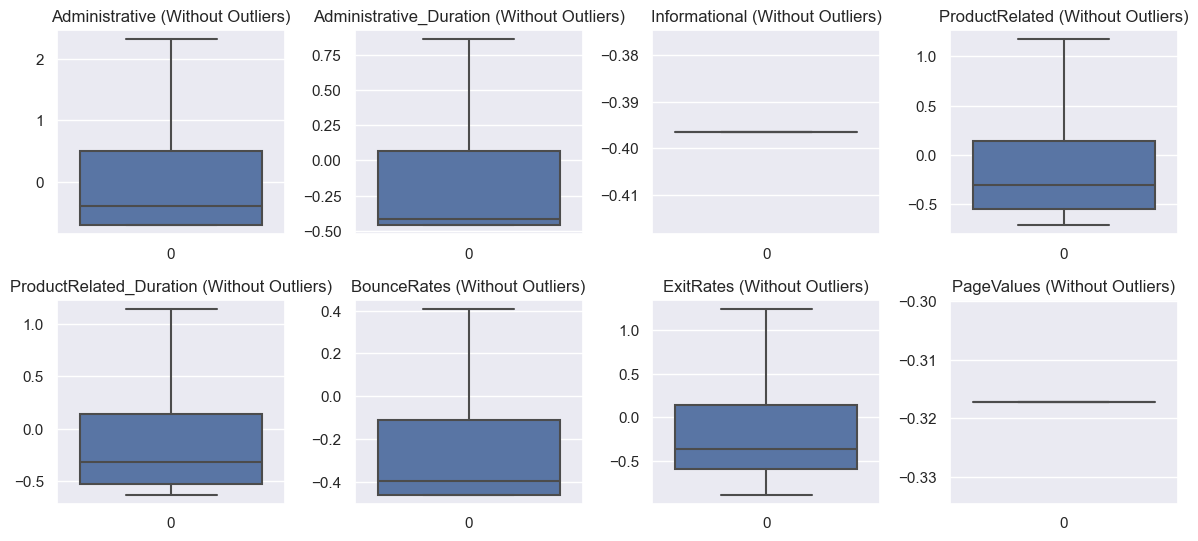

In [21]:
# Plot box plots for numerical variables after removing outliers
plt.figure(figsize=(12, 8))
for i, var in enumerate(selected_features):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=data[var], showfliers=False)
    plt.title(var + ' (Without Outliers)')
plt.tight_layout()
plt.show()





In [26]:
# Encoding categorical variables using one-hot encoding
cat_vars = ['Month', 'VisitorType', 'Weekend', 'Revenue']
data_encoded = pd.get_dummies(data[cat_vars], drop_first=True)


In [27]:
# Combine encoded categorical variables with numerical variables
data_encoded = pd.concat([data_encoded, data[num_vars]], axis=1)
data_encoded.head()

,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,...,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,False,False,0,1,0,0,0,0,0,0,...,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821
1,False,False,0,1,0,0,0,0,0,0,...,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821
2,False,False,0,1,0,0,0,0,0,0,...,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821
3,False,False,0,1,0,0,0,0,0,0,...,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821
4,True,False,0,1,0,0,0,0,0,0,...,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821


In [29]:
# Split the data into X (features) and y (target variable)
X = data_encoded.drop('Revenue', axis=1)
y = data_encoded['Revenue']

In [30]:
# Perform feature selection using univariate feature selection
f_scores, p_values = f_classif(X, y)

# Print the feature importance scores
feature_importance = pd.DataFrame({'Variable': X.columns, 'F-Score': f_scores, 'p-value': p_values})
feature_importance['p-value'] = round(feature_importance['p-value'], 3)
feature_importance = feature_importance.sort_values('F-Score', ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
                         Variable      F-Score  p-value
20                     PageValues  3949.262960    0.000
19                      ExitRates   552.286502    0.000
16                 ProductRelated   317.844350    0.000
7                       Month_Nov   302.565427    0.000
17        ProductRelated_Duration   293.027603    0.000
18                    BounceRates   286.375674    0.000
12                 Administrative   242.586667    0.000
11  VisitorType_Returning_Visitor   134.386024    0.000
14                  Informational   112.751843    0.000
13        Administrative_Duration   108.928515    0.000
21                     SpecialDay    84.080012    0.000
6                       Month_May    76.086201    0.000
15         Informational_Duration    61.306613    0.000
5                       Month_Mar    50.608562    0.000
2                       Month_Feb    27.426051    0.000
1                       Month_Dec    13.530917    0.000
8                       Mont

In [38]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Split the data into X (features) and y (target variable)
X = data_encoded.drop('Revenue', axis=1)
y = data_encoded['Revenue']

# Perform feature selection using univariate feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=15)  # Select the top 8 features
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Create a new DataFrame with the selected features
selected_data = data_encoded[selected_features]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Month_Dec', 'Month_June', 'Month_May', 'Month_Nov',
       'VisitorType_Returning_Visitor', 'Administrative',
       'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay'],
      dtype='object')


In [39]:
# Data Validation & Cleansing
feature_importance = feature_importance.dropna()  # Remove rows with missing values
 

In [40]:
from sklearn.model_selection import train_test_split

# Split the data into X (features) and y (target variable)
X = selected_data
y = data_encoded['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (7891, 15) (7891,)
Validation set shape: (1973, 15) (1973,)
Testing set shape: (2466, 15) (2466,)


In [41]:


# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the training set
X_train_std = scaler.fit_transform(X_train)

# Standardize the validation set
X_val_std = scaler.transform(X_val)

# Standardize the testing set
X_test_std = scaler.transform(X_test)


In [ ]:

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate the models
for name, model in models.items():
    # Train the model
    model.fit(X_train_std, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_val_std)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

In [48]:
# Select the best-performing model based on validation metrics
best_model_name = None
best_model_score = 0.0

for name, model in models.items():
    # Make predictions on the testing set
    y_pred = model.predict(X_test_std)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics for the current model
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()

    # Check if the current model outperforms the previous best model
    if accuracy > best_model_score:
        best_model_name = name
        best_model_score = accuracy

# Print the best model
print(f"Best Model: {best_model_name}")


Model: Logistic Regression
Accuracy: 0.8743
Precision: 0.7644
Recall: 0.3552
F1-Score: 0.4850

Model: Decision Tree
Accuracy: 0.8520
Precision: 0.5581
Recall: 0.5377
F1-Score: 0.5477

Model: Random Forest
Accuracy: 0.8897
Precision: 0.7340
Recall: 0.5304
F1-Score: 0.6158

Model: Gradient Boosting
Accuracy: 0.8946
Precision: 0.7240
Recall: 0.5937
F1-Score: 0.6524

Best Model: Gradient Boosting


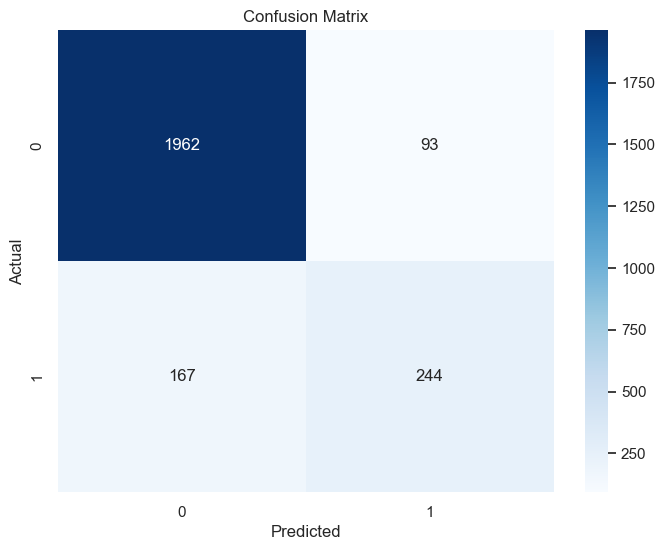

In [92]:
# Select the best model
best_model = models[best_model_name]

# Make predictions on the testing set
y_pred = best_model.predict(X_test_std)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)


Accuracy: 0.894566098945661
Precision: 0.7240356083086054
Recall: 0.5936739659367397
F1 Score: 0.6524064171122995
AUC: 0.7742092457420926


#### predict the exit rates

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the exit rate prediction model
exit_model = GradientBoostingClassifier()
exit_model.fit(X_train, y_train)

# Predict exit rates for the test set
y_pred = exit_model.predict(X_test)

# Evaluate the accuracy of the exit rate prediction model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8909164639091647


In [64]:
#Extract predicted exit page labels for the test data using the trained exit_model:
predicted_exit_labels = exit_model.predict(X_test)


In [65]:
#Combine the predicted exit page labels with the actual revenue labels:
predicted_data = pd.DataFrame({'PredictedExit': predicted_exit_labels, 'Revenue': y_test})


In [91]:
#Group the data by exit page and calculate the mean revenue for each exit page:
revenue_by_exit = predicted_data.groupby('PredictedExit')['Revenue'].mean()

print("\nMean Revenue by Exit Page:")
print(revenue_by_exit)



Mean Revenue by Exit Page:
PredictedExit
False    0.080357
True     0.710059
Name: Revenue, dtype: float64


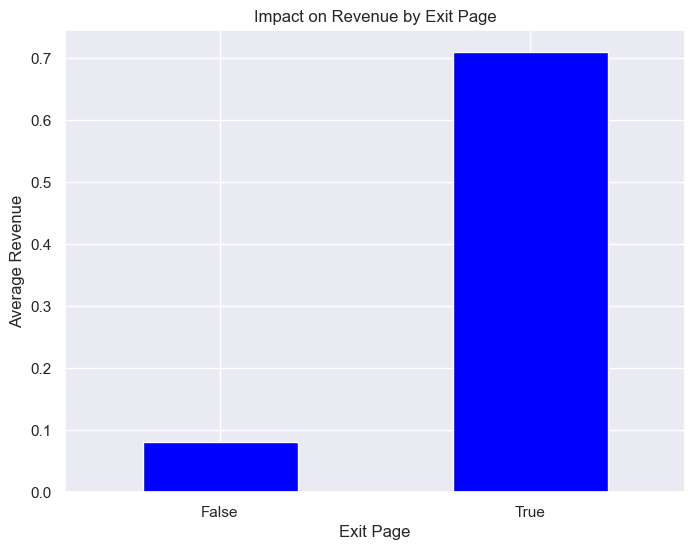

In [69]:
import matplotlib.pyplot as plt

# Plot the average revenue by exit page
plt.figure(figsize=(8, 6))
revenue_by_exit.plot(kind='bar', color='blue')
plt.xlabel('Exit Page')
plt.ylabel('Average Revenue')
plt.title('Impact on Revenue by Exit Page')
plt.xticks(rotation=0)
plt.show()


In [76]:
# Calculate average revenue for each exit page
exit_page_revenue = data.groupby('ExitRates')['Revenue'].mean()

# Sort the exit pages by average revenue in descending order
exit_page_revenue_sorted = exit_page_revenue.sort_values(ascending=False)

# Print the exit pages with the highest average revenue
top_exit_pages = exit_page_revenue_sorted.head(5)
print("Exit Pages with Highest Average Revenue:")
print(top_exit_pages)


Exit Pages with Highest Average Revenue:
ExitRates
-0.415365    1.0
-0.684617    1.0
-0.472833    1.0
-0.690577    1.0
-0.472872    1.0
Name: Revenue, dtype: float64
